In [1]:
import warnings
warnings.filterwarnings("ignore", message = r"Passing", category = FutureWarning)
import os
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import seaborn

Using TensorFlow backend.


In [2]:
train_path = r"C:\Users\Ravindra Singh\Desktop\AI Projects\Face Id Detection\dataset\train"
test_path = r"C:\Users\Ravindra Singh\Desktop\AI Projects\Face Id Detection\dataset\test"

In [3]:
dim = 162

In [4]:
def data_label(path):
    data = []
    label = []
    for i in os.listdir(path):
        for j in os.listdir(path + '/' + i):
            img_path = path + '/' + i + '/' + j
            img = PIL.Image.open(img_path)
            img = img.resize((dim, dim))
            img = np.array(img)
            img = img.reshape((162,162,1))
            data.append(img)
            if i == "0":
                label.append(0)
            elif i == "1":
                label.append(1)
            else:
                pass
    data = np.array(data)
    return(data, label)

In [5]:
train_data, train_label = data_label(train_path)
test_data, test_label = data_label(test_path)

In [6]:
print(train_data.shape)
print(len(train_label))
print(test_data.shape)
print(len(test_label))

(3960, 162, 162, 1)
3960
(1466, 162, 162, 1)
1466


In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(10, (5, 5), strides = 3, activation = 'relu', input_shape = (dim, dim, 1), ))
model.add(keras.layers.MaxPooling2D((3, 3)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(10, (3, 3), strides = 2, activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 53, 53, 10)        260       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 10)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 17, 17, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 10)          910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
__________

In [13]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [51]:
history = model.fit(train_data, train_label, batch_size=32, epochs = 10, verbose = 1, validation_data = (test_data, test_label))

Train on 3960 samples, validate on 1466 samples
Epoch 1/10
3960/3960 [==============================] - 8s 2ms/step - loss: 0.0755 - acc: 0.9720 - val_loss: 0.0508 - val_acc: 0.9775
Epoch 2/10
3960/3960 [==============================] - 8s 2ms/step - loss: 0.0799 - acc: 0.9720 - val_loss: 0.0507 - val_acc: 0.9748
Epoch 3/10
3960/3960 [==============================] - 9s 2ms/step - loss: 0.0787 - acc: 0.9720 - val_loss: 0.0552 - val_acc: 0.9768
Epoch 4/10
3960/3960 [==============================] - 10s 3ms/step - loss: 0.0805 - acc: 0.9687 - val_loss: 0.0520 - val_acc: 0.9775
Epoch 5/10
3960/3960 [==============================] - 8s 2ms/step - loss: 0.0755 - acc: 0.9722 - val_loss: 0.0493 - val_acc: 0.9768
Epoch 6/10
3960/3960 [==============================] - 9s 2ms/step - loss: 0.0690 - acc: 0.9707 - val_loss: 0.0477 - val_acc: 0.9816
Epoch 7/10
3960/3960 [==============================] - 9s 2ms/step - loss: 0.0804 - acc: 0.9697 - val_loss: 0.0450 - val_acc: 0.9816
Epoch 8/10
39

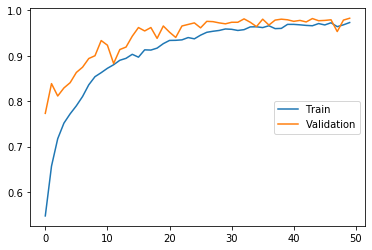

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

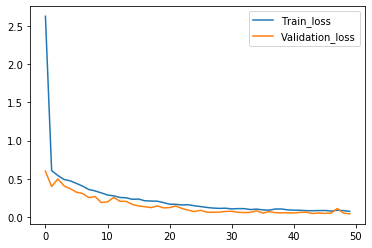

In [16]:
plt.plot(history.history['loss'], label="train_loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend(['Train_loss', 'Validation_loss'], loc='upper right')
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(test_data, test_label)
print("Test Accuracy:", test_acc)

1466/1466 [==============================] - 2s 2ms/step
Test Accuracy: 0.9829467936720074


In [18]:
pred = model.predict(test_data, steps = 1)
pred

array([[0.01876378],
       [0.        ],
       [0.        ],
       ...,
       [0.539257  ],
       [0.9991799 ],
       [0.99999964]], dtype=float32)

In [20]:
r_pred = []
for i in range(len(pred)):
    if pred[i] >= 0.5:
        r_pred.append(1)
    else:
        r_pred.append(0)

In [21]:
data = {'Prediction' : r_pred, 'Actual' : test_label}

In [22]:
df = pd.DataFrame(data)
df

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1461,1,1
1462,1,1
1463,1,1
1464,1,1


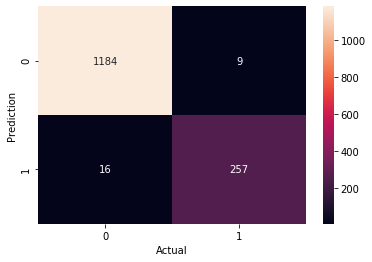

In [23]:
cm = pd.crosstab(df.Prediction, df.Actual)
seaborn.heatmap(cm, annot = True, fmt = '.0f')

In [24]:
def SinglePred(file):
    im = PIL.Image.open(file)
    im = im.resize((dim, dim))
    array = np.asarray(im)
    array = np.reshape(array, (1,dim, dim, 1))
    plt.imshow(im)
    x = model.predict(array)
    if x >= 0.5:
        print('Ravindra')
    else:
        print('No_Anomaly')

Ravindra


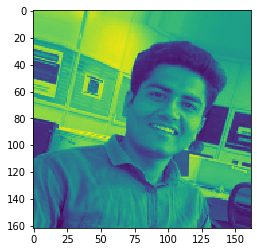

In [48]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\AI Projects\Face Id Detection\dataset\Test\1\ravi (15).jpg")

No_Anomaly


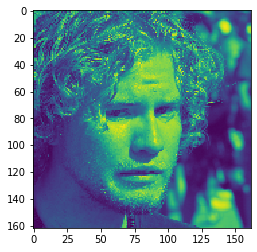

In [46]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\AI Projects\Face Id Detection\dataset\Test\0\01045.png")

Ravindra


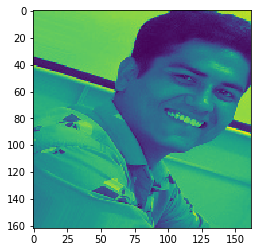

In [43]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\AI Projects\Face Id Detection\dataset\Test\1\ravi (23)_augmented14.jpg")

No_Anomaly


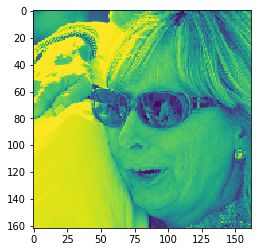

In [39]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\AI Projects\Face Id Detection\dataset\Test\0\01077.png")

Ravindra


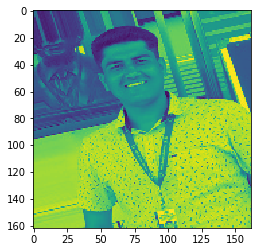

In [32]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\AI Projects\Face Id Detection\dataset\Test\1\ravi (40)_augmented19.jpg")

Ravindra


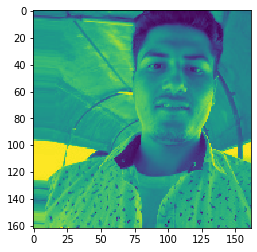

In [49]:
SinglePred(r"C:\Users\Ravindra Singh\Desktop\AI Projects\Face Id Detection\dataset\Test\1\ravi (300).jpg")

In [50]:
model.save("ravi_face_5k.h5")